#### Update content of the CPM Atlas - generate maps based on the CPM data <br>
Function        : Plot maps in a uniform way based on the CPM data<br>
Author          : Team BETA<br>
First Built     : 2021.12.15<br>
Last Update     : 2022.01.10<br>
Library         : os, glob, netcdf4, matplotlib, cartopy, argparse<br>
Description     : This script serves to extract netcdf data and generate maps
                  for CPM catalogue page.<br>
Return Values   : png files<br>
Note            : All the maps are generated in a uniform way.<br>

In [3]:
import os
import numpy as np
import xarray as xr
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [4]:
# please specify data path
datapath = '/mnt/d/NLeSC/BETA/EUCP/CPM/DEMOSTRATOR'
output_path = '../static/cpm_analysis'

In [3]:
# load data
resolution = '3KM'
variable = 'pr'
region = 'ALP'
category = 'FREQ'
dataset = xr.open_dataset(Path(datapath,f'{resolution}',
                          f'{variable}_{region}_00275EU_historical_ENSEMBLE_1hr_1996-2005_{category}.nc'))
dataset

<xarray.Dataset>
Dimensions:    (lon: 786, lat: 567, bin: 1, bnds: 2, time: 4)
Coordinates:
  * lon        (lon) float32 -3.0 -2.973 -2.945 -2.918 ... 18.53 18.56 18.59
  * lat        (lat) float32 37.7 37.73 37.76 37.78 ... 53.18 53.21 53.24 53.27
  * bin        (bin) float64 0.1
  * time       (time) object 2006-01-01 00:00:00 ... 2005-11-30 23:00:00
Dimensions without coordinates: bnds
Data variables:
    bin_bnds   (bin, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, bin, lat, lon) float32 ...
Attributes: (12/135)
    CDI:                                       Climate Data Interface version...
    history:                                   Sat Dec 14 23:31:00 2019: cdo ...
    source:                                    RegCM Model output file
    institution:                               ICTP
    Conventions:                               CF-1.7
    title:                                     ICTP Regional Climatic model V4
    ...                                        ...
    holtslag_th10_estimate:                    1
    holtslag_th10_maximize:                    1
    holtslag_th10_niteration:                  1
    NCO:                                       "4.6.3"
    nco_openmp_thread_number:                  1
    CDO:                                       Climate Data Operators version...

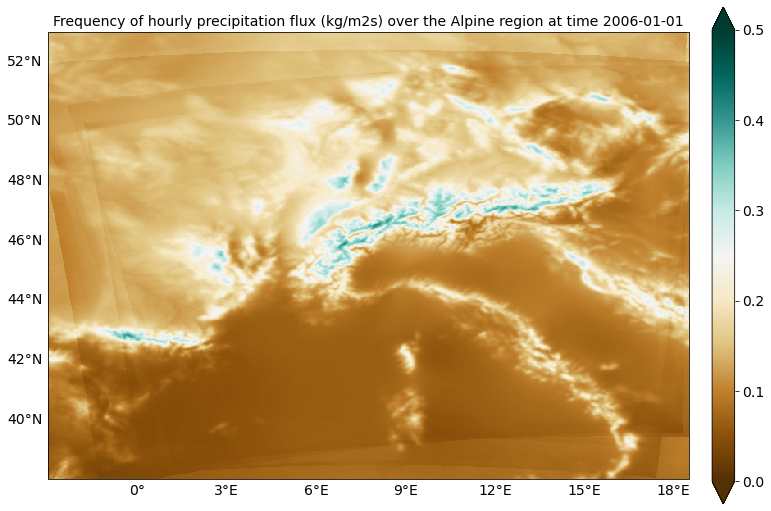

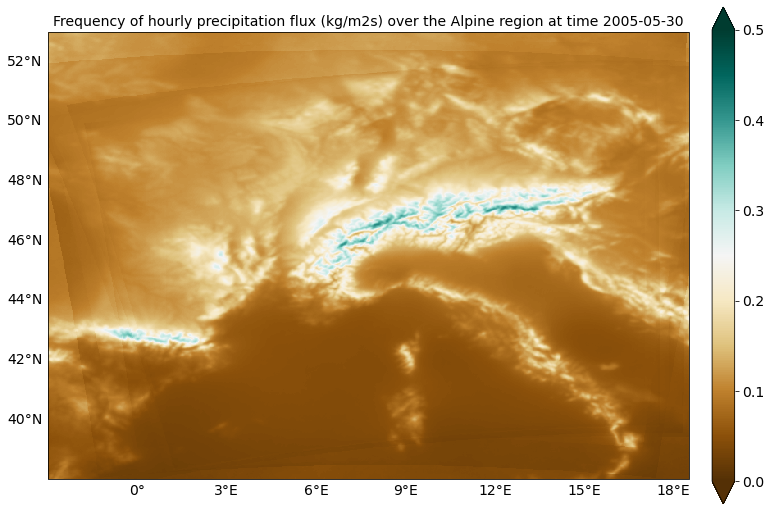

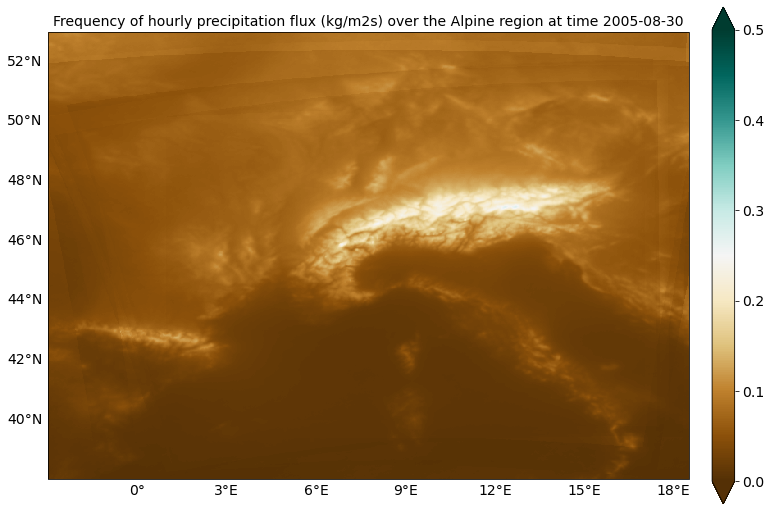

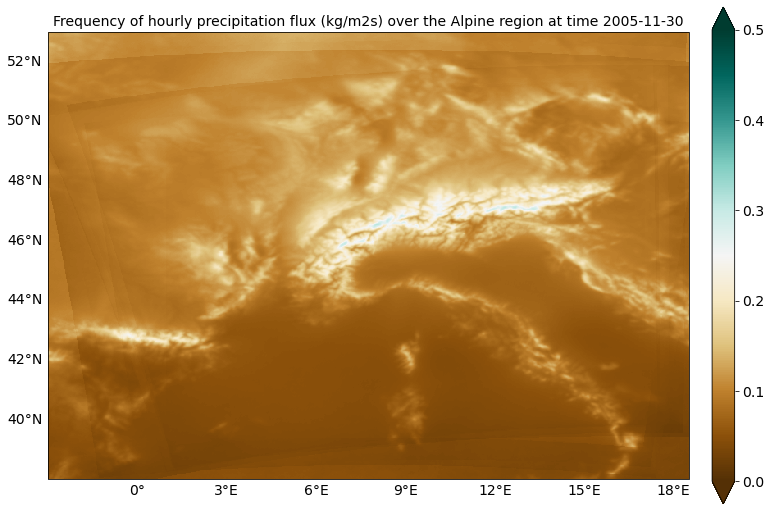

In [4]:
for i in dataset.indexes['time']:
    data = dataset['pr'].sel(time=i)
    fig = plt.figure(figsize=(12.8, 9.6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-3, 18.5, 38, 53], ccrs.PlateCarree())  # East, West, South, Nouth
    #ax.coastlines(resolution="110m", color="black", linewidth=2)
    gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="--",
    )
    gl.top_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlabel_style = {"size": 14, "color": "black"}
    gl.ylabel_style = {"size": 14, "color": "black"}
    cs = data.plot(cmap="BrBG", vmin=0, vmax=0.5, ax=ax, x='lon', y='lat', add_colorbar=False)
    cbar = fig.colorbar(
    cs, extend="both", orientation="vertical", shrink=0.8, pad=0.03, spacing="uniform"
    )
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(f"Frequency of hourly precipitation flux (kg/m2s) over the Alpine region at time {str(i)[:10]}", fontsize=14)
    plt.tight_layout()
    plt.show()
    fig.savefig(Path(output_path,
                f"{region}_{variable}_{resolution}_{category}_{str(i)[:10]}.png"),
                dpi=150)

In [5]:
# load data
resolution = '3KM'
variable = 'pr'
region = 'ALP'
category = 'INT'
dataset = xr.open_dataset(Path(datapath,f'{resolution}',
                          f'{variable}_{region}_00275EU_historical_ENSEMBLE_1hr_1996-2005_{category}.nc'))
dataset

<xarray.Dataset>
Dimensions:    (lon: 786, lat: 567, bin: 1, bnds: 2, time: 4)
Coordinates:
  * lon        (lon) float32 -3.0 -2.973 -2.945 -2.918 ... 18.53 18.56 18.59
  * lat        (lat) float32 37.7 37.73 37.76 37.78 ... 53.18 53.21 53.24 53.27
  * bin        (bin) float64 0.1
  * time       (time) object 2006-01-01 00:00:00 ... 2005-11-30 23:00:00
Dimensions without coordinates: bnds
Data variables:
    bin_bnds   (bin, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, bin, lat, lon) float32 ...
Attributes: (12/135)
    CDI:                                       Climate Data Interface version...
    history:                                   Fri Dec 13 08:05:46 2019: cdo ...
    source:                                    RegCM Model output file
    institution:                               ICTP
    Conventions:                               CF-1.7
    title:                                     ICTP Regional Climatic model V4
    ...                                        ...
    holtslag_th10_estimate:                    1
    holtslag_th10_maximize:                    1
    holtslag_th10_niteration:                  1
    NCO:                                       "4.6.3"
    nco_openmp_thread_number:                  1
    CDO:                                       Climate Data Operators version...

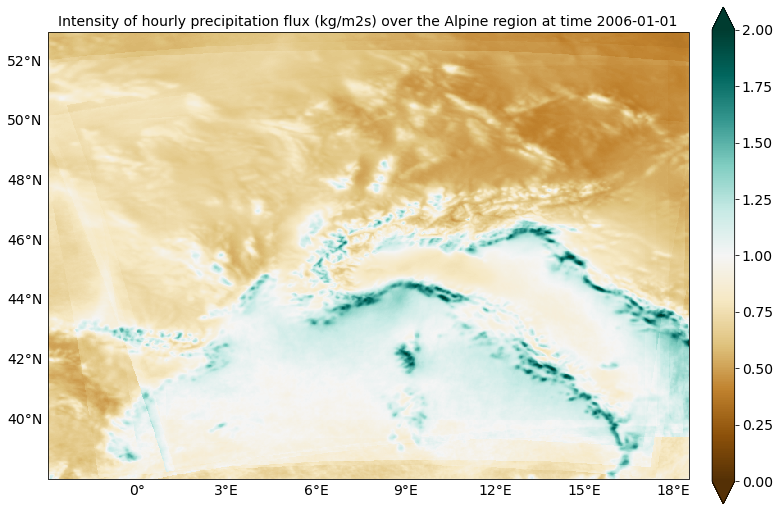

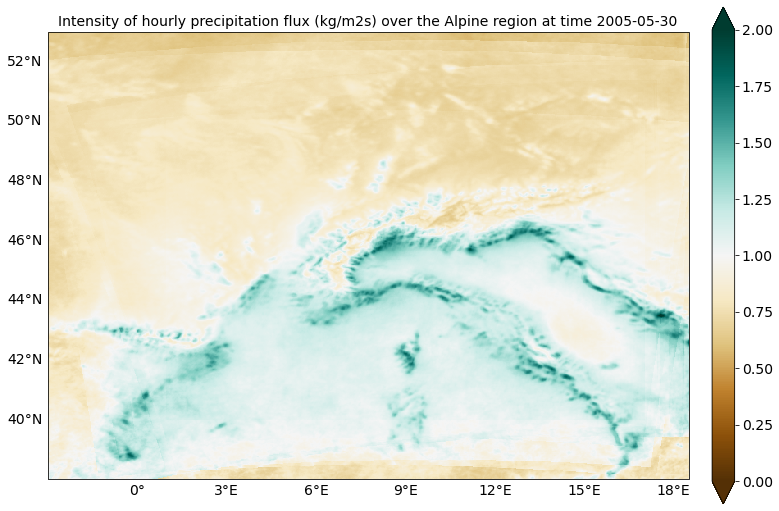

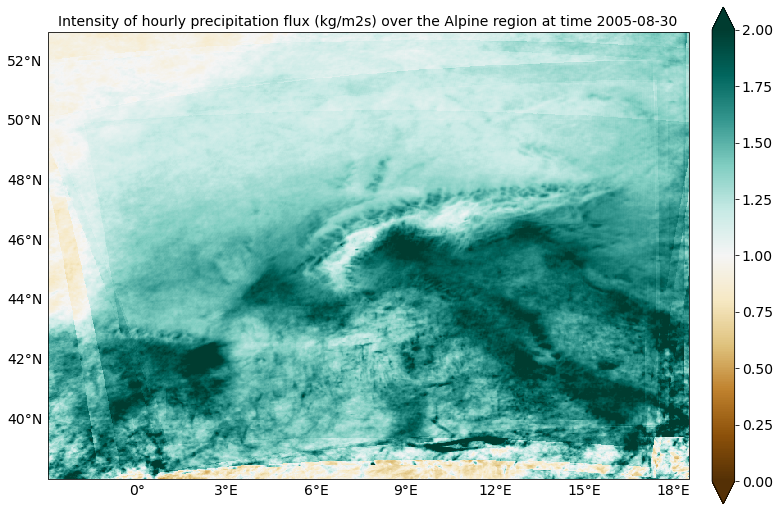

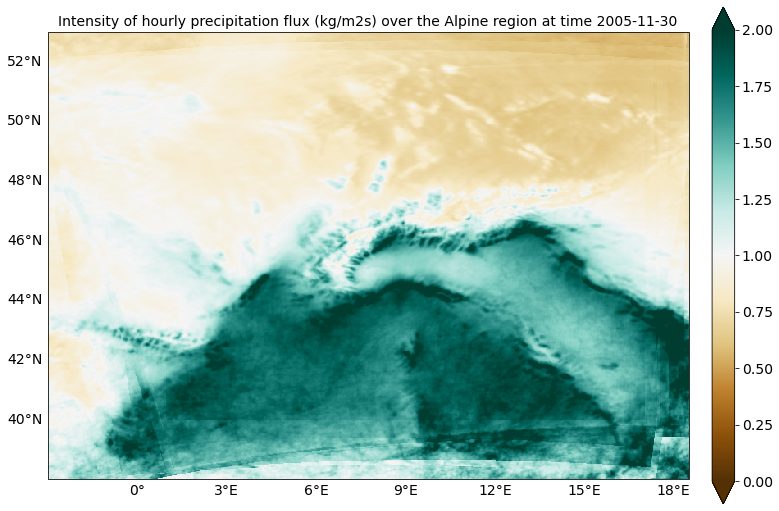

In [6]:
for i in dataset.indexes['time']:
    data = dataset['pr'].sel(time=i)
    fig = plt.figure(figsize=(12.8, 9.6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-3, 18.5, 38, 53], ccrs.PlateCarree())  # East, West, South, Nouth
    #ax.coastlines(resolution="110m", color="black", linewidth=2)
    gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="--",
    )
    gl.top_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlabel_style = {"size": 14, "color": "black"}
    gl.ylabel_style = {"size": 14, "color": "black"}
    cs = data.plot(cmap="BrBG", vmin=0, vmax=2.0, ax=ax, x='lon', y='lat', add_colorbar=False)
    cbar = fig.colorbar(
    cs, extend="both", orientation="vertical", shrink=0.8, pad=0.03, spacing="uniform"
    )
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(f"Intensity of hourly precipitation flux (kg/m2s) over the Alpine region at time {str(i)[:10]}", fontsize=14)
    plt.tight_layout()
    plt.show()
    fig.savefig(Path(output_path,
                f"{region}_{variable}_{resolution}_{category}_{str(i)[:10]}.png"),
                dpi=150)

In [5]:
# load data
resolution = '12KM'
variable = 'pr'
region = 'EUR'
category = 'FREQ'
dataset = xr.open_dataset(Path(datapath,f'{resolution}',
                          f'{variable}_{region}_011EU_historical_ENSEMBLE_1hr_1996-2005_{category}.nc'))
dataset

<xarray.Dataset>
Dimensions:    (lon: 881, lat: 408, bin: 1, bnds: 2, time: 4)
Coordinates:
  * lon        (lon) float64 -44.81 -44.69 -44.56 -44.44 ... 64.94 65.06 65.19
  * lat        (lat) float64 21.81 21.94 22.06 22.19 ... 72.31 72.44 72.56 72.69
  * bin        (bin) float64 0.1
  * time       (time) object 2005-12-30 23:00:00 ... 2005-11-30 23:00:00
Dimensions without coordinates: bnds
Data variables:
    bin_bnds   (bin, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, bin, lat, lon) float32 ...
Attributes: (12/142)
    CDI:                                       Climate Data Interface version...
    history:                                   Sat Dec 14 23:32:42 2019: cdo ...
    source:                                    RegCM Model output file
    institution:                               ICTP
    Conventions:                               CF-1.7
    title:                                     ICTP Regional Climatic model V4
    ...                                        ...
    uwpbl_eddy_LS_stable_PBL_scaling:          1.5
    uwpbl_czero:                               5.869
    uwpbl_nuk:                                 5.0
    NCO:                                       netCDF Operators version 4.8.1...
    nco_openmp_thread_number:                  1
    CDO:                                       Climate Data Operators version...

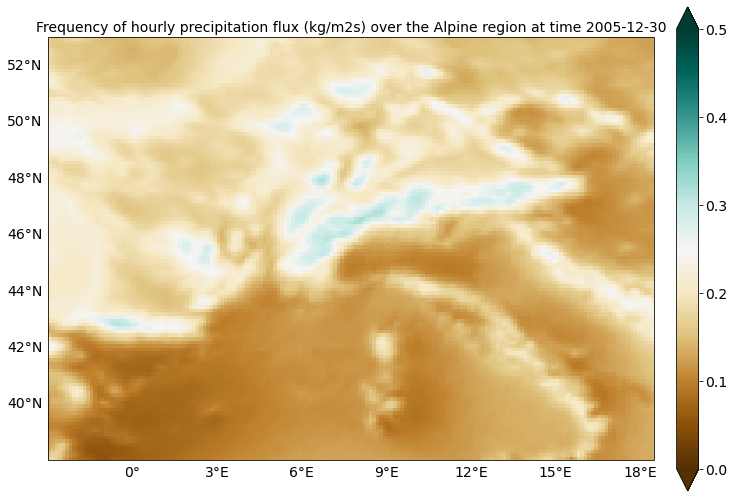

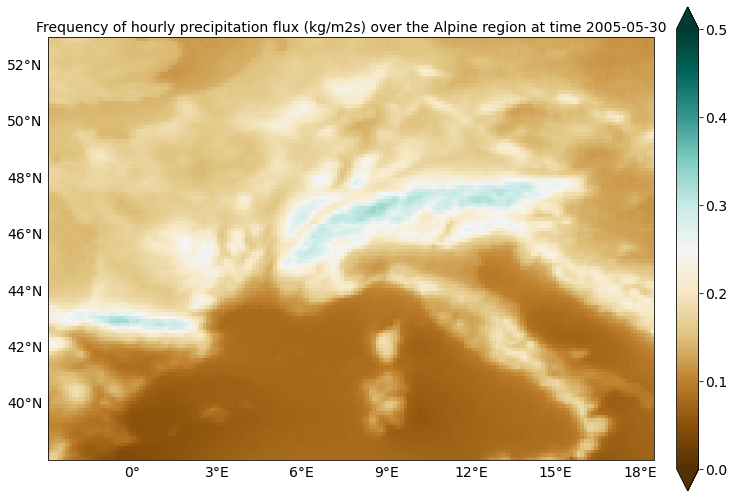

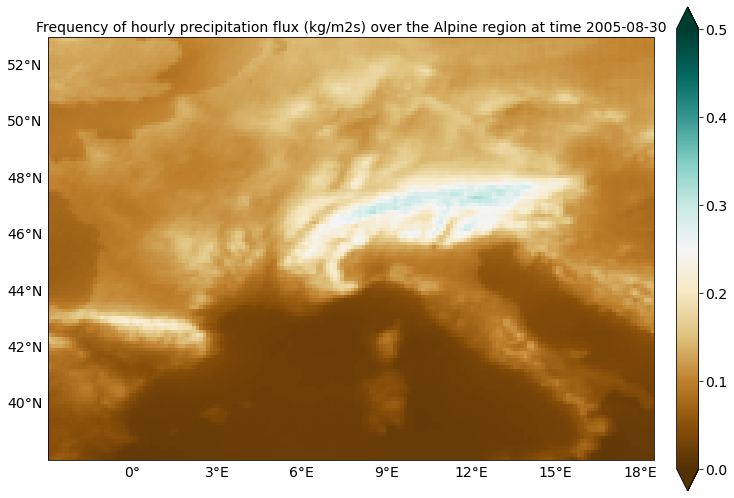

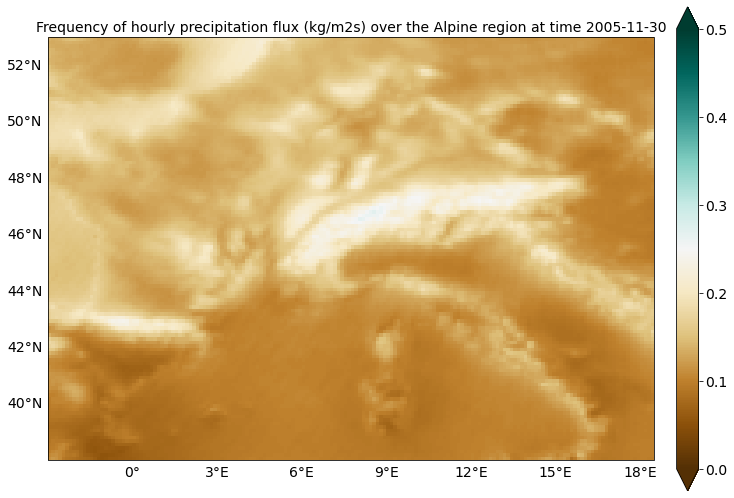

In [6]:
for i in dataset.indexes['time']:
    data = dataset['pr'].sel(time=i)
    fig = plt.figure(figsize=(12.8, 9.6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-3, 18.5, 38, 53], ccrs.PlateCarree())  # East, West, South, Nouth
    #ax.coastlines(resolution="110m", color="black", linewidth=2)
    gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="--",
    )
    gl.top_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlabel_style = {"size": 14, "color": "black"}
    gl.ylabel_style = {"size": 14, "color": "black"}
    cs = data.plot(cmap="BrBG", vmin=0, vmax=0.5, ax=ax, x='lon', y='lat', add_colorbar=False)
    cbar = fig.colorbar(
    cs, extend="both", orientation="vertical", shrink=0.8, pad=0.03, spacing="uniform"
    )
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(f"Frequency of hourly precipitation flux (kg/m2s) over the Alpine region at time {str(i)[:10]}", fontsize=14)
    plt.tight_layout()
    plt.show()
    fig.savefig(Path(output_path,
                f"ALP_{variable}_{resolution}_{category}_{str(i)[:10]}.png"),
                dpi=150)

In [9]:
# load data
resolution = '12KM'
variable = 'pr'
region = 'EUR'
category = 'INT'
dataset = xr.open_dataset(Path(datapath,f'{resolution}',
                          f'{variable}_{region}_011EU_historical_ENSEMBLE_1hr_1996-2005_{category}.nc'))
dataset

<xarray.Dataset>
Dimensions:    (lon: 881, lat: 408, bin: 1, bnds: 2, time: 4)
Coordinates:
  * lon        (lon) float64 -44.81 -44.69 -44.56 -44.44 ... 64.94 65.06 65.19
  * lat        (lat) float64 21.81 21.94 22.06 22.19 ... 72.31 72.44 72.56 72.69
  * bin        (bin) float64 0.1
  * time       (time) object 2005-12-30 23:00:00 ... 2005-11-30 23:00:00
Dimensions without coordinates: bnds
Data variables:
    bin_bnds   (bin, bnds) float64 ...
    time_bnds  (time, bnds) object ...
    pr         (time, bin, lat, lon) float32 ...
Attributes: (12/142)
    CDI:                                       Climate Data Interface version...
    history:                                   Sat Dec 14 22:01:00 2019: cdo ...
    source:                                    RegCM Model output file
    institution:                               ICTP
    Conventions:                               CF-1.7
    title:                                     ICTP Regional Climatic model V4
    ...                                        ...
    uwpbl_eddy_LS_stable_PBL_scaling:          1.5
    uwpbl_czero:                               5.869
    uwpbl_nuk:                                 5.0
    NCO:                                       netCDF Operators version 4.8.1...
    nco_openmp_thread_number:                  1
    CDO:                                       Climate Data Operators version...

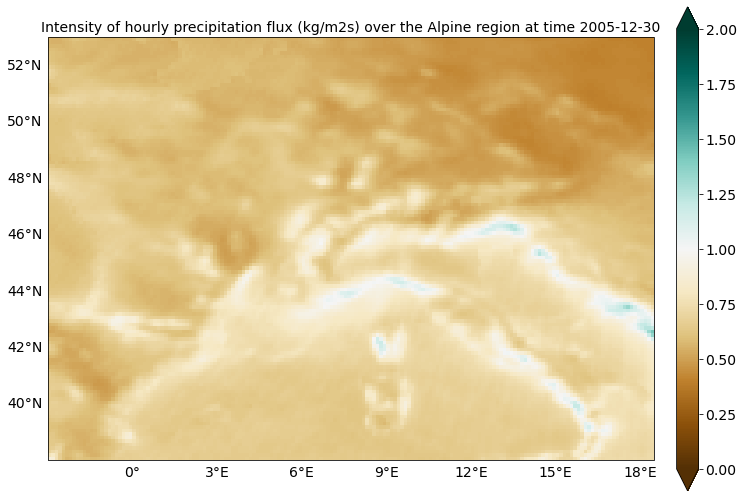

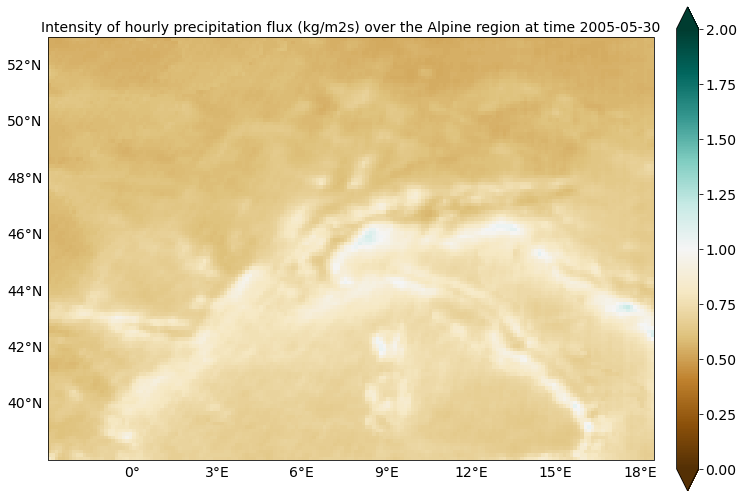

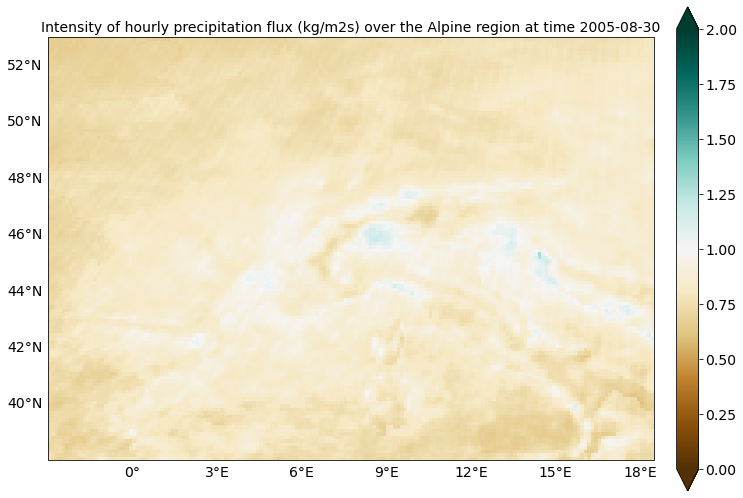

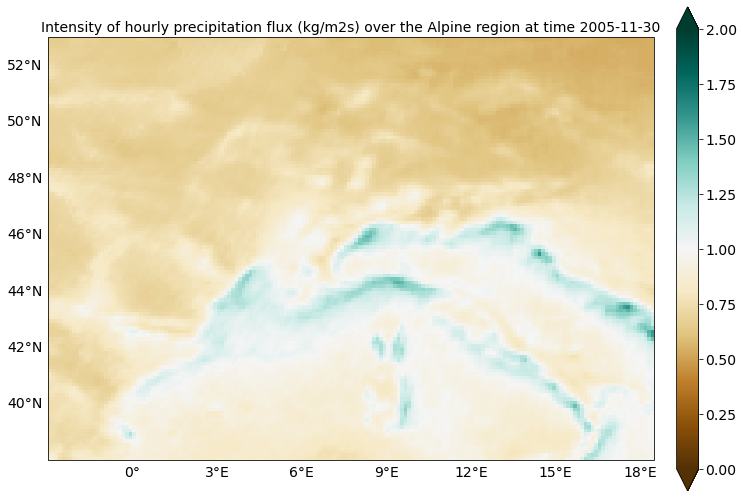

In [10]:
for i in dataset.indexes['time']:
    data = dataset['pr'].sel(time=i)
    fig = plt.figure(figsize=(12.8, 9.6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-3, 18.5, 38, 53], ccrs.PlateCarree())  # East, West, South, Nouth
    #ax.coastlines(resolution="110m", color="black", linewidth=2)
    gl = ax.gridlines(
    crs=ccrs.PlateCarree(),
    draw_labels=True,
    linewidth=1,
    color="gray",
    alpha=0.5,
    linestyle="--",
    )
    gl.top_labels = False
    gl.bottom_labels = True
    gl.left_labels = True
    gl.right_labels = False
    gl.xlines = False
    gl.ylines = False
    gl.xlabel_style = {"size": 14, "color": "black"}
    gl.ylabel_style = {"size": 14, "color": "black"}
    cs = data.plot(cmap="BrBG", vmin=0, vmax=2.0, ax=ax, x='lon', y='lat', add_colorbar=False)
    cbar = fig.colorbar(
    cs, extend="both", orientation="vertical", shrink=0.8, pad=0.03, spacing="uniform"
    )
    cbar.ax.tick_params(labelsize=14)
    ax.set_title(f"Intensity of hourly precipitation flux (kg/m2s) over the Alpine region at time {str(i)[:10]}", fontsize=14)
    plt.tight_layout()
    plt.show()
    fig.savefig(Path(output_path,
                f"ALP_{variable}_{resolution}_{category}_{str(i)[:10]}.png"),
                dpi=150)